#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg') 
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = 'Face!' ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x,y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow('Total number of face detected are #', img)

cv2.waitKey(5000)
cv2.destroyAllWindows()

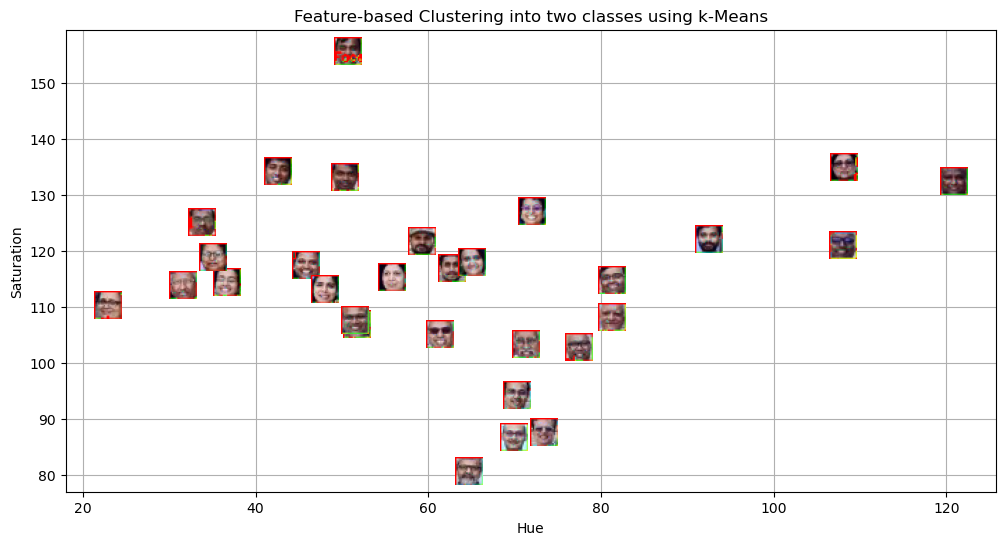

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state = 0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Feature-based Clustering into two classes using k-Means')
## Put grid
plt.grid()
## show the plot
plt.show()

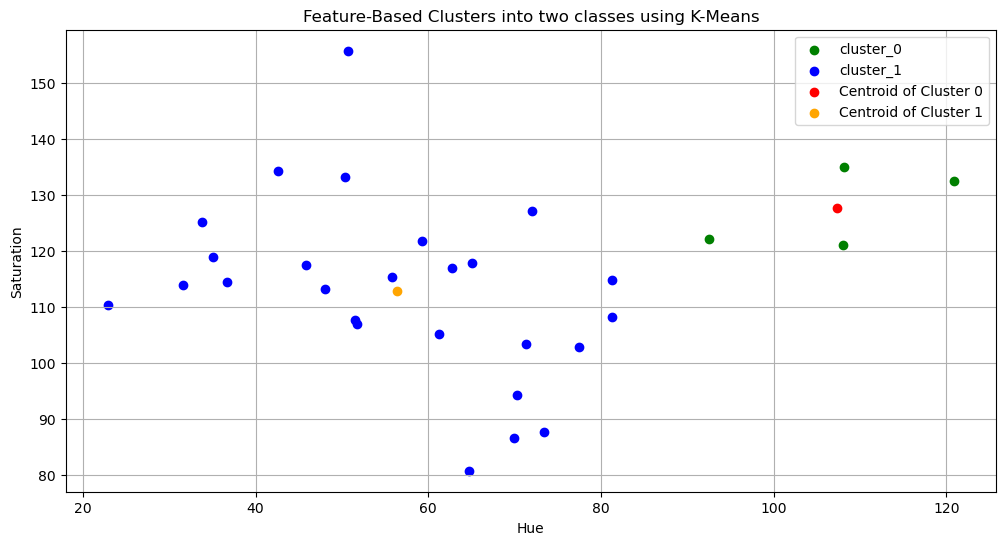

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color = 'green', label = 'cluster_0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color = 'blue', label = 'cluster_1')

# Calculate and plot centroids
centroid_0 = (np.mean(cluster_0_points[:,0]), np.mean(cluster_0_points[:,1]))
centroid_1 = (np.mean(cluster_1_points[:,0]), np.mean(cluster_1_points[:,1]))

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1], color = 'red', label = 'Centroid of Cluster 0')
plt.scatter(centroid_1[0],centroid_1[1], color = 'orange', label = 'Centroid of Cluster 1')


plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Feature-Based Clusters into two classes using K-Means')
plt.legend()
plt.grid()
plt.show()

In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

template_face = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(30,30), maxSize=(1000,1000))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_face:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Detected Face in Template Image', template_img)

cv2.waitKey(5000)
cv2.destroyAllWindows()      

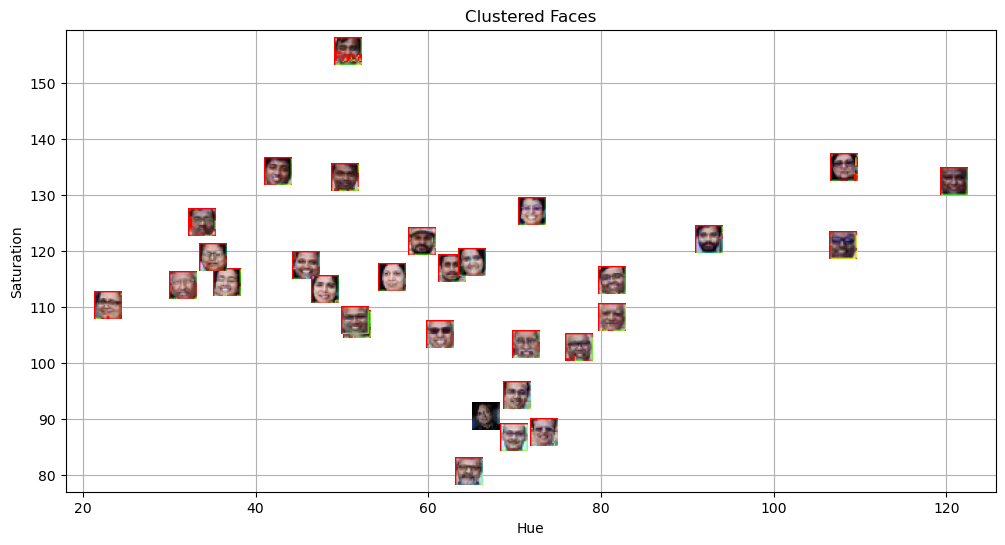

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add grid
plt.grid()

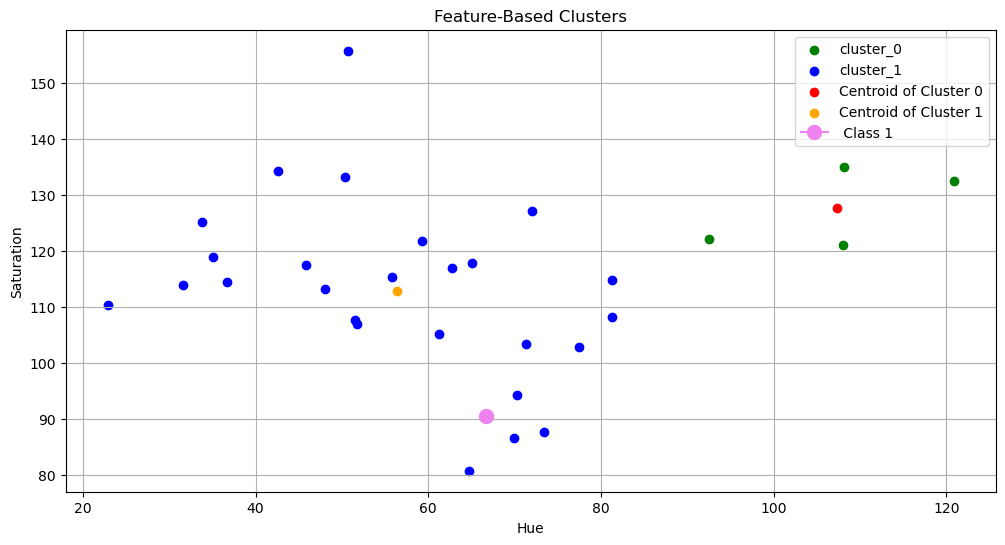

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color = 'green', label = 'cluster_0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color = 'blue', label = 'cluster_1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points[:,0]), np.mean(cluster_0_points[:,1])
centroid_1 =(np.mean(cluster_1_points[:,0]), np.mean(cluster_1_points[:,1]))
plt.scatter(centroid_0[0],centroid_0[1], color = 'red', label = 'Centroid of Cluster 0') ## plot for centroid 0
plt.scatter(centroid_1[0],centroid_1[1], color = 'orange', label = 'Centroid of Cluster 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class {}'.format(template_label))

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Feature-Based Clusters')
plt.legend()
plt.grid()
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Distance-based classification algorithms use different distance metrics to compare data points, each suited for specific types of data and applications. These metrics vary in how they measure similarity, their sensitivity to scale, and their computational efficiency, making them useful in different scenarios. Some common distance metrics are Eucledian distance, Mahalanobis Distance, Manhattan Distance, Chebyshev Distance, Cosine Distance, Hamming Distance and Minkowski Distance (Generalised Distnace Metric). 

#### 2. What are some real-world applications of distance-based classification algorithms? 
Distance-based classification algorithms have key real-world applications across Cybersecurity & Fraud Detection, Social, Business, and AI/ML domains. In Cybersecurity & Fraud Detection, they help identify suspicious activities through Anomaly and Fraud Detection, Spam Filtering, and Intrusion Detection in Networks. In the Social domain, they enhance personalization and security with Emotion Classification, Recommender Systems, and Face Recognition. In Business and Finance, they support decision-making in Credit Worthiness Assessment and Product Categorization. In AI/ML, they are widely applied to Image Classification, Speech Recognition, and Handwriting Recognition, enabling automation and pattern recognition in various industries.

#### 3. Explain various distance metrics. 
1. Euclidean Distance: Represents the shortest distance between two vectors. The most common way to measure how far two points are from each other in space. It works well for numerical data but can struggle in very high-dimensional settings.

2. Mahalanobis Distance: Unlike Euclidean, this measures how far a point is from a whole distribution, taking into account correlations in the data. It's great for detecting outliers and working with multivariate data.

3. Manhattan Distance: Instead of a straight line, this measures distance by adding up the steps taken along each axis, like navigating a city grid. It often works better than Euclidean in high-dimensional spaces.

4. Chebyshev Distance: Also called Chessboard Distance because it’s like calculating the fewest moves a king needs to travel between two squares. It looks at the largest difference in any direction.

5. Cosine Distance: Instead of measuring physical distance, this looks at the angle between two vectors. It’s useful for comparing things like documents, where direction (or meaning) matters more than size.

6. Hamming Distance: Counts how many positions two strings or binary codes differ at. It’s widely used in error detection and DNA sequencing.

#### 4. What is the role of cross validation in model performance? 
Cross-validation helps ensure a machine learning model performs well on unseen data by testing it multiple times on different subsets before final evaluation. Instead of relying on a single train-test split, the dataset is randomly divided into training and validation sets multiple times (usually 10) to validate the model before testing it on the final test set. This helps **prevent overfitting** by making sure the model learns actual patterns rather than memorizing the data. It also gives a **more reliable performance estimate** by averaging results over multiple runs. Additionally, cross-validation helps **fine-tune hyperparameters**, like the value of K in KNN, by keeping a portion of the test dataset for validation and observing the validation error as a performance metric. This is especially useful for small datasets, making the most of the available data.

#### 5. Explain variance and bias in terms of KNN? 
In KNN, variance refers to how much the model's predictions change when the training data changes slightly. A small K (like K = 1) makes the model overly sensitive, leading to high variance and overfitting. On the other hand, bias is the model's tendency to oversimplify patterns. A large K smooths predictions too much, making the model ignore important details and leading to high bias (underfitting). The key is finding the right balance—too small, and the model memorizes the data; too large, and it misses patterns. Cross-validation helps choose an optimal K to avoid both extremes.